## 0. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype 

In [2]:
df = pd.read_csv("data/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.drop(["CustomerID"], axis=1, inplace=True)

## 1. Exploratory Analysis and Visualization

In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


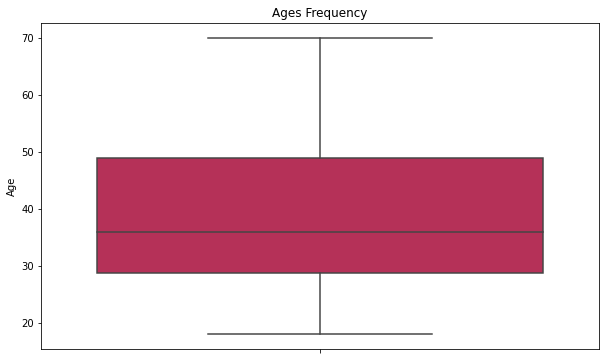

In [7]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.boxplot(y=df["Age"], palette="rocket");

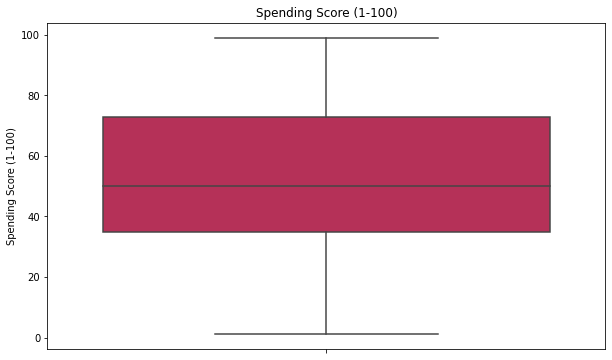

In [8]:
plt.figure(figsize=(10,6))
plt.title("Spending Score (1-100)")
sns.boxplot(y=df["Spending Score (1-100)"], palette="rocket");

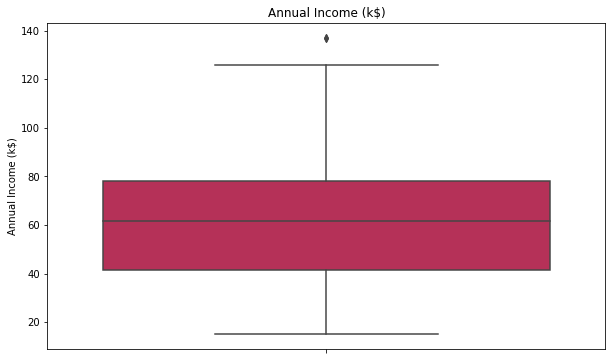

In [9]:
plt.figure(figsize=(10,6))
plt.title("Annual Income (k$)")
sns.boxplot(y=df["Annual Income (k$)"], palette="rocket");

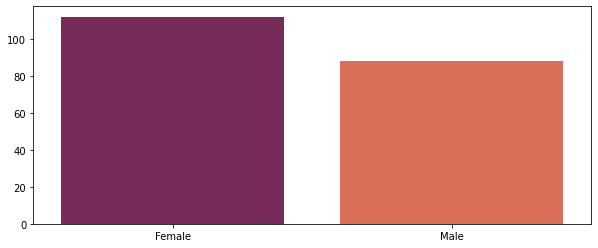

In [10]:
gender = df.Gender.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=gender.index, y=gender.values, palette="rocket")
plt.show()

In [11]:
gender

Female    112
Male       88
Name: Gender, dtype: int64

Text(0, 0.5, 'Number of Customer')

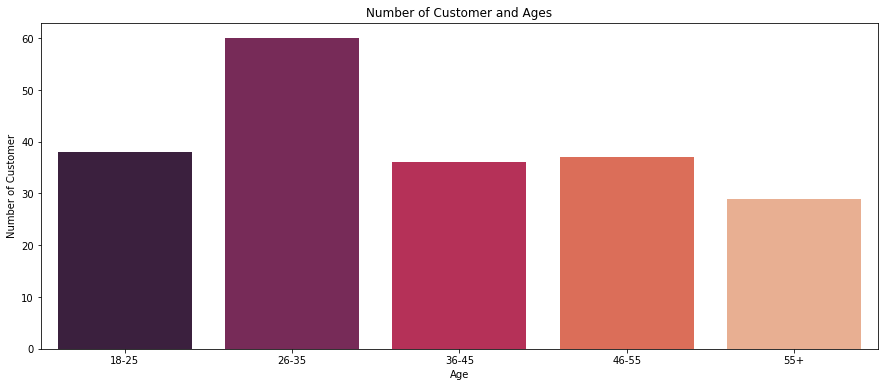

In [12]:
#Binning the ages into 5 categories
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
#plt.show()

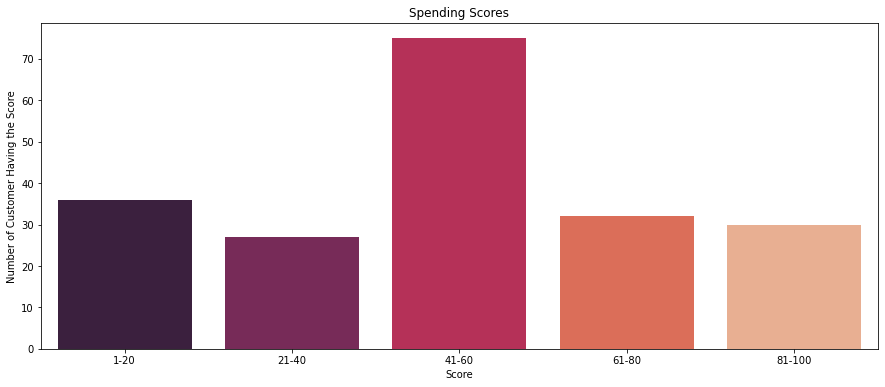

In [13]:
#Binning spending score in 5 categories
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

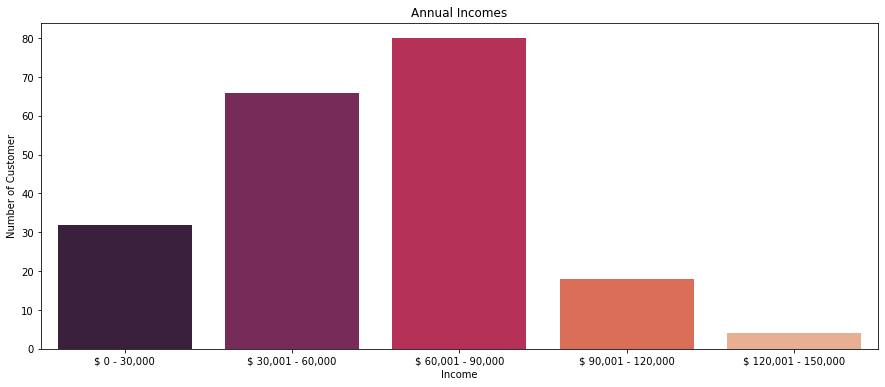

In [14]:
#Binning income into 5 categories
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="rocket")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

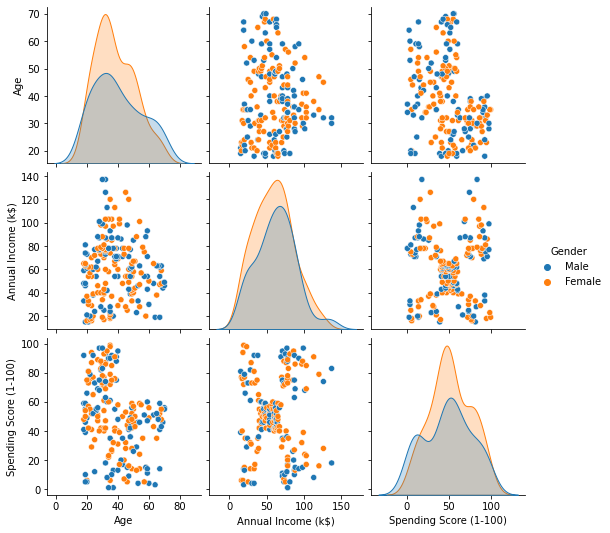

In [15]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
sns.pairplot(df, hue="Gender");

# 2. KMeans Clustering Models

#### Elbow method conducted to identify the optimal k value. WCSS is the sum of squared distances between the individual points (customers) to the cluster center. The optimal k value will be at a WCSS that begins to be decrease linearly, at the "elbow". 

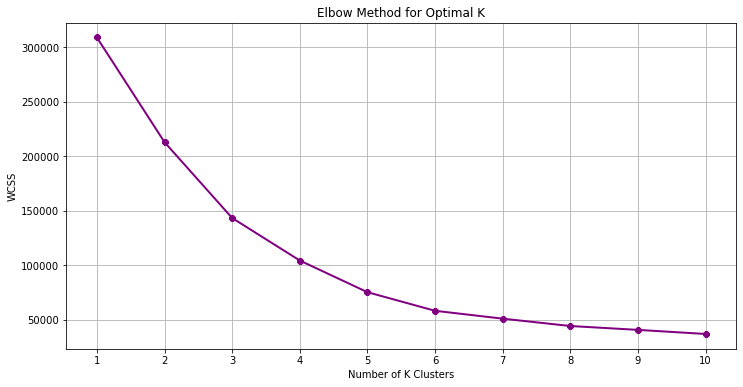

In [16]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="purple", marker ="8")
plt.xlabel("Number of K Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title('Elbow Method for Optimal K')
plt.show()

##### Comments: Based on Elbow method could go with either 4-6 clusters, so I decided to test 4 and 5 clusters. The lack of a true elbow could be due to small sample size. 

## 2a. Kmeans Model #1: Kmeans with 5 clusters

In [19]:
df5 = df #creating new df for 5 cluster kmeans

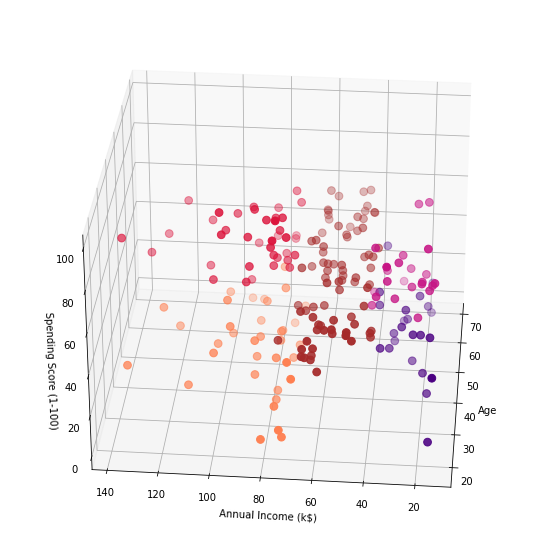

In [20]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df5.iloc[:,1:])
df5["label"] = clusters
centroids_df = pd.DataFrame()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df5.label == 0], df5["Annual Income (k$)"][df5.label == 0], df5["Spending Score (1-100)"][df5.label == 0], c='brown', s=60)
ax.scatter(df.Age[df5.label == 1], df5["Annual Income (k$)"][df5.label == 1], df5["Spending Score (1-100)"][df5.label == 1], c='crimson', s=60)
ax.scatter(df.Age[df5.label == 2], df5["Annual Income (k$)"][df5.label == 2], df5["Spending Score (1-100)"][df5.label == 2], c='coral', s=60)
ax.scatter(df.Age[df5.label == 3], df5["Annual Income (k$)"][df5.label == 3], df5["Spending Score (1-100)"][df5.label == 3], c='indigo', s=60)
ax.scatter(df.Age[df5.label == 4], df5["Annual Income (k$)"][df5.label == 4], df5["Spending Score (1-100)"][df5.label == 4], c='mediumvioletred', s=60)
ax.view_init(30, 185)
#ax.scatter(centroids_df['X'],centroids_df['Y'], centroids_df['Z'], s=90, marker=",", color="r")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

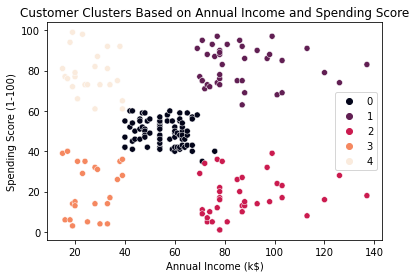

In [21]:
sns.scatterplot(data=df5,x=df5['Annual Income (k$)'], y=df5['Spending Score (1-100)'], 
                hue=clusters, palette = "rocket")
#plt.scatter(x=centroids_[:,0], y=centroids_km[:,1], s=300, c='red', alpha=0.5)
plt.title("Customer Clusters Based on Annual Income and Spending Score")
plt.legend()
plt.show()

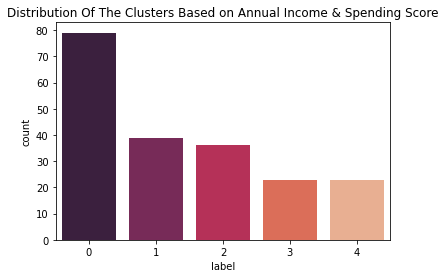

In [22]:
sns.countplot(x=df5["label"], palette= "rocket")
plt.title("Distribution Of The Clusters Based on Annual Income & Spending Score")
plt.show()

## 2b. Kmeans Model #2: KMeans with 4 clusters

In [23]:
df4=df #dataframe for 4 clusters kmeans

In [24]:
X = df4.iloc[:,2:4].values
km4 = KMeans(n_clusters=4, n_init=10, random_state=0)
clusters_km4 = km4.fit_predict(X)
labels_km4 = km4.labels_

In [25]:
centroids_km4 = kmeans.cluster_centers_

In [26]:
df4['clusters'] = clusters_km4

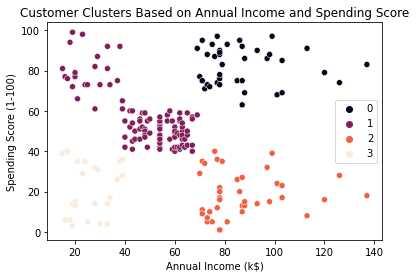

In [27]:
sns.scatterplot(data=df,x=df4['Annual Income (k$)'], y=df4['Spending Score (1-100)'], 
                hue=df['clusters'], palette = "rocket")
#plt.scatter(x=centroids_km4[:,0], y=centroids_km4[:,1], s=300, c='red', alpha=0.5)
plt.title("Customer Clusters Based on Annual Income and Spending Score")
plt.legend()
plt.show()

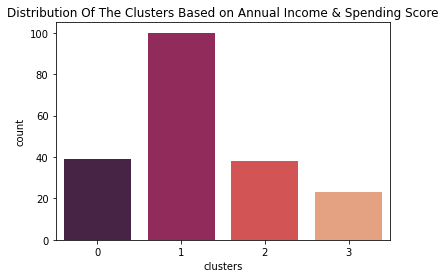

In [28]:
sns.countplot(x=df4["clusters"], palette= "rocket")
plt.title("Distribution Of The Clusters Based on Annual Income & Spending Score")
plt.show()

##### Comments: I decided to go with 4 clusters as it appears that the 5th cluster was made of average income and average spending score but in 4 clusters those customers are moved to the low income/high spending score splitting the groups into low/high no averages. 

## 3. K-Nearest Neighbors Model for Predicting KMeans-4 Labels

### a. Data Processing

In [40]:
data = df4

In [41]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'label', 'clusters'],
      dtype='object')

In [42]:
#map gender 1 for female and 0 for male
gender_map = {'Female': 1, 'Male': 0}
data.Gender.replace(gender_map, inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label,clusters
0,0,19,15,39,3,3
1,0,21,15,81,4,1
2,1,20,16,6,3,3
3,1,23,16,77,4,1
4,1,31,17,40,3,3


### b. Feature Scaling & Standardization

In [44]:
# Standardize the data to all be the same unit

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop(['label','clusters'], axis=1))

# Transforming the data
scaled_features = scaler.transform(data.drop(['label','clusters'], axis=1))
scaled_features

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

In [48]:
features = pd.DataFrame(scaled_features, columns=data.columns[0:4])
features.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


### c. K-Nearest Neighbors Model

In [49]:
#train test split
from sklearn.model_selection import train_test_split, GridSearchCV

X = features
y = data.clusters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) #k=5
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 3, 2, 1, 2, 0,
       0, 1, 1, 1, 1, 0, 0, 3, 3, 0, 1, 3, 1, 3, 0, 2, 2, 2, 3, 2, 2, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 3, 2, 1, 1], dtype=int32)

In [51]:
# Evaluating the algorithm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, pred)))

[[10  0  0  0]
 [ 0 28  0  0]
 [ 0  1 11  0]
 [ 0  2  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95        28
           2       1.00      0.92      0.96        12
           3       1.00      0.80      0.89        10

    accuracy                           0.95        60
   macro avg       0.98      0.93      0.95        60
weighted avg       0.95      0.95      0.95        60

Accuracy Score: 0.95


##### Comment: Started with 5 Neighbors for no exact reason at all, and resulted in 95% accuracy. There is no connection to KNeighbors and KMeans from the 2 models.

### d. Using GridSearch Best Estimate to provide the parameters for the best KNN model. 

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])

params = [{'knn__n_neighbors': [3, 4, 5, 6], #neighbors to test
         'knn__weights': ['uniform', 'distance'], 
         'knn__leaf_size': [15, 20]}] #increases number of searches

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5) #crossval,  number of cv folds for each combination of params

gs_knn.fit(X_train, y_train)
#gs_knn.best_params_ #best parameters
gs_knn.best_estimator_ #best model 

Pipeline(steps=[('mms', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(leaf_size=15, n_neighbors=4,
                                      weights='distance'))])

In [54]:
# Applying the best parameters to the KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(leaf_size=15, n_neighbors=4,
                                      weights='distance') 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 3, 2, 1, 2, 0,
       0, 1, 1, 1, 1, 0, 0, 3, 3, 0, 1, 3, 1, 3, 0, 2, 2, 2, 3, 2, 2, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 3, 2, 1, 1], dtype=int32)

In [55]:
# Evaluating the algorithm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, pred)))

[[10  0  0  0]
 [ 0 28  0  0]
 [ 0  0 12  0]
 [ 0  2  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        12
           3       1.00      0.80      0.89        10

    accuracy                           0.97        60
   macro avg       0.98      0.95      0.96        60
weighted avg       0.97      0.97      0.97        60

Accuracy Score: 0.9666666666666667


##### Comment: Accuracy increased from 95% to 96.6% with GridSearch's KNN parameters. 

## 3. Compare to Logistic Regression Model

In [56]:
#packages
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression

#split data in 10 chunks
kfold=KFold(n_splits=10,random_state=7,shuffle=True) 

LR=LogisticRegression(solver='liblinear')

#pass model and data to apply crossvalidation and labels
results=cross_val_score(LR,X_train,y_train,cv=kfold) 

print("Accuracy: %.3f%% (%.3f%%)"%(results.mean()*100.0,results.std()*100.0))

Accuracy: 95.000% (4.574%)


##### Comment: Similar to KNN performance. Could optimize the model further (another time).

## 4. Comparing to Random Forest Model

In [57]:
# Training the algorithm
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=101)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [58]:
# Evaluating the algorithm

print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

[[10  0  0  0]
 [ 0 28  0  0]
 [ 0  0 12  0]
 [ 0  1  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        12
           3       1.00      0.90      0.95        10

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60

Accuracy Score: 0.9833333333333333


##### Comments: Random Forest Model is the winnner!  (Could optimize further)

Thanks! Hope you enjoyed!